# Universidade Federal do Ceará - Campus Quixadá-CE
## Trabalho Final Aprendizado de Máquina
### Tema: 2.4 GHZ Indoor Channel Measurements Data Set
#### Link: https://archive.ics.uci.edu/ml/datasets/2.4+GHZ+Indoor+Channel+Measurements
---
### Informações do Aluno: 
#### Nome: *João Mateus Dias do Carmo*
##### Matrícula: *390187*
#### Semestre: *7º*
#### Curso: *Engenharia de Computação*
#### Email: joaomateus102030@gmail.com
#### GitHub: https://github.com/JoaoMateus1010

## Descrição do trabalho
O trabalho tem como objetivo a análise de sinais de transmissão entre um receptor e um emisor de forma a classificar a comunicação entre os dispositivos em uma certa faixa de transmissão definida pelo IEEE 802.11 (Wi-Fi) nas faixas dos canais 1,6 e 11.

A medição do domínio de freqüência do parâmetro de espalhamento, S21, do canal sem fio foi realizada utilizando o analisador de rede vetorial ZVB14 (VNA) de Rhode e Schwartz. O sistema de medição consiste no VNA, cabos RF de baixa perda e antenas omnidirecionais nas extremidades do transmissor e receptor.

**Nomeclatura usada no trabalho:**
>* Tx- Transmissor
>* Rx- Receptor
>* f- Frequência
>* t- Tempo
>* BW- Largura de Banda
>* FCH- Frequência de corte alta
>* FCL- Frequência de corte baixa

**Lugares das medições e suas classificações de esclarecimento dos dados:**
>* Lab139 - altamente confuso
>* Corredor_rm155 - meio confuso (Há muitas paredes)
>* Main_Lobby - Baixa confusão
>* Sports_Hall - Baixa confusão (Espaço aberto)

**Informações do ambiente de medição**
>* Tx e Rx estão a 1.5 metros de altura verticalmente.
>* Foram feitas 10 varreduras consecutivas
>* Cada varredura contém 601 pontos de amostra de frequência
>* O espaçamento entre as amostras é f=0,167 MHz, equivalente a (t=5,9µs)
>* É definido BW=100MHz centralizada em f=2.4GHz
>* Resolução é definida como t=10ns

**Objetivo**

É esperado que o algoritimo seja capaz de classificar em qual faixa de frequência o está atuando na comunicação.
Definindo os canais como:
>* Canal 1: 1 Mbit/s ~ 0.12 MB/s
>* Canal 6: 6 Mbit/s ~ 0.66 MB/s
>* Canal 11: 11 Mbit/s ~ 1.31 MB/s

## Importações necessárias

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Definições das Funções

## Definições dos nomes

### Localização da leitura

In [2]:
Nomes_Locais_Leitura = ("Corridor_rm155","Lab139","Main_Lobby","Sport_Hall")

### Distância entre Tx e Rx 
Foi definido três receptores, **R1**, **R2** e **R3**.  De forma a definir as distâncias entre o transmisor mais próximo medida em metros.

In [3]:
TX_RX_Distancias = {"Tx-R1":"4.6","Tx-R2":"7.1","Tx-R3":"9.6"}

### Definições dos nomes das pastas para leitura do dataset

In [4]:
Nomes_Pastas = list()

In [5]:
for local in Nomes_Locais_Leitura:
  Nomes_Pastas.append(str(local)+str("_")+str(TX_RX_Distancias["Tx-R2"]))

In [6]:
Leitura_Arquivo = pd.read_csv("Dataset/numbers.csv",header=None,dtype=np.str)

In [7]:
Leitura_Arquivo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,0010,0011,0012,0013
1,0100,0101,0102,0103,0104,0105,0106,0107,0108,0109,0110,0111,0112,0113
2,0200,0201,0202,0203,0204,0205,0206,0207,0208,0209,0210,0211,0212,0213
3,0300,0301,0302,0303,0304,0305,0306,0307,0308,0309,0310,0311,0312,0313
4,0400,0401,0402,0403,0404,0405,0406,0407,0408,0409,0410,0411,0412,0413
5,0500,0501,0502,0503,0504,0505,0506,0507,0508,0509,0510,0511,0512,0513
6,0600,0601,0602,0603,0604,0605,0606,0607,0608,0609,0610,0611,0612,0613
7,0700,0701,0702,0703,0704,0705,0706,0707,0708,0709,0710,0711,0712,0713
8,0800,0801,0802,0803,0804,0805,0806,0807,0808,0809,0810,0811,0812,0813
9,0900,0901,0902,0903,0904,0905,0906,0907,0908,0909,0910,0911,0912,0913


In [8]:
Locais_leitura = "Loc_"+Leitura_Arquivo.values

### Criação dos Datasets para cada leitura

In [80]:
Datasets=dict()
for Name in Nomes_Locais_Leitura:
    Datasets[Name+"_7.1"] = pd.DataFrame()

In [81]:
for pastaRaiz in Nomes_Pastas:
    for subPasta in Locais_leitura:
        for pastaLocal in subPasta:
            for index in range(1,11):
                path = str("Dataset/")+str(pastaRaiz+"/")+str(pastaLocal+"/Lab_139_")+str(index)+str("Ch1.csv")
                #Datasets[pastaRaiz] += pd.read_csv(path,skiprows=2,sep=';')                
                Datasets[pastaRaiz] = pd.concat([Datasets[pastaRaiz],pd.read_csv(path,skiprows=2,sep=";",float_precision=15,dtype=np.float)])

In [85]:
for (key,value) in Datasets.items():
    Datasets[key].columns = Datasets[key].columns.str.replace('Unnamed: 5','Label')
    Datasets[key]["label_read_1"] = np.nan
    Datasets[key]["label_read_2"] = np.nan

In [86]:
DatasetsBackup = Datasets

## Visualização Inicial dos Dados

In [12]:
for key in Datasets:
    DatasetAtual = Datasets[key]
    print("----> Dataset: "+str(key)+"\n")
    print(DatasetAtual.head())
    print("\n")
    print(DatasetAtual.info())
    print("\n")
    print(DatasetAtual.describe())
    print("\n")

----> Dataset: Corridor_rm155_7.1

       freq[Hz]  re:Trc1_S11  im:Trc1_S11  re:Trc2_S21  im:Trc2_S21  Label  \
0  2.400000e+09     0.150847     0.112573     0.000150    -0.003453    NaN   
1  2.400167e+09     0.150640     0.110470     0.000107    -0.003357    NaN   
2  2.400333e+09     0.151034     0.108374     0.000086    -0.003420    NaN   
3  2.400500e+09     0.151127     0.105698     0.000075    -0.003568    NaN   
4  2.400667e+09     0.151428     0.103363    -0.000033    -0.003591    NaN   

   label_read_1  label_read_2  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           NaN           NaN  
4           NaN           NaN  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177960 entries, 0 to 600
Data columns (total 8 columns):
freq[Hz]        1177960 non-null float64
re:Trc1_S11     1177960 non-null float64
im:Trc1_S11     1177960 non-null float64
re:Trc2_S21     1177960 non-null float64
im:Trc2_S21     1177960 non-nu

### Visualização Gráfica

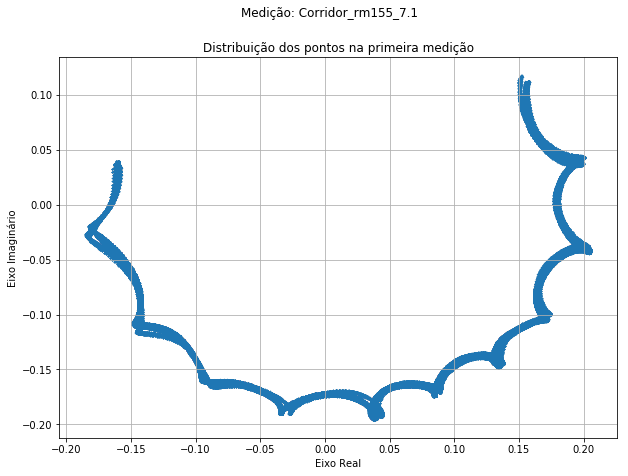

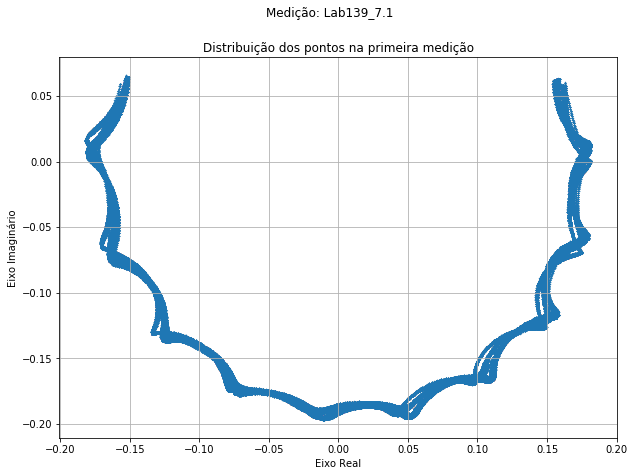

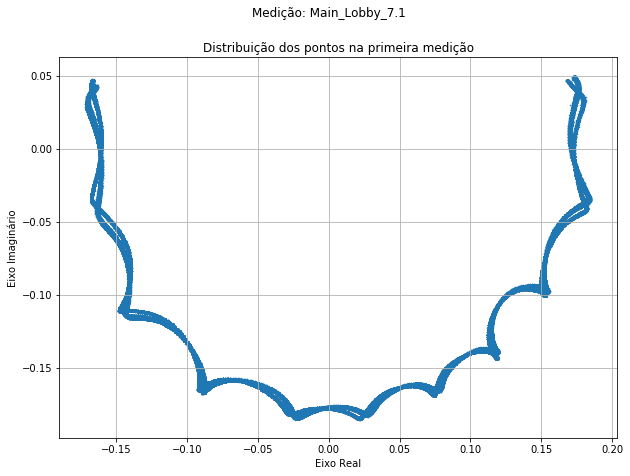

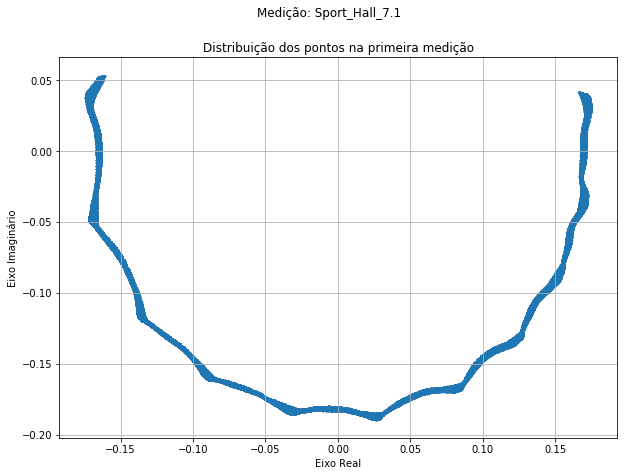

In [13]:
array_x = None
array_y = None
for (key,value) in Datasets.items():    
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na primeira medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc1_S11"].values
    array_y = Datasets[key]["im:Trc1_S11"].values  
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1)

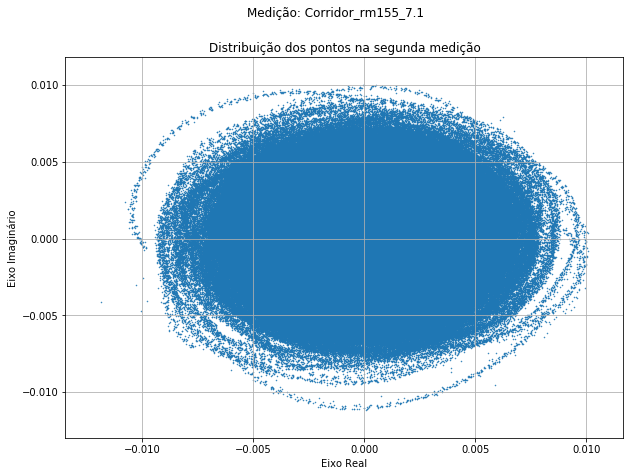

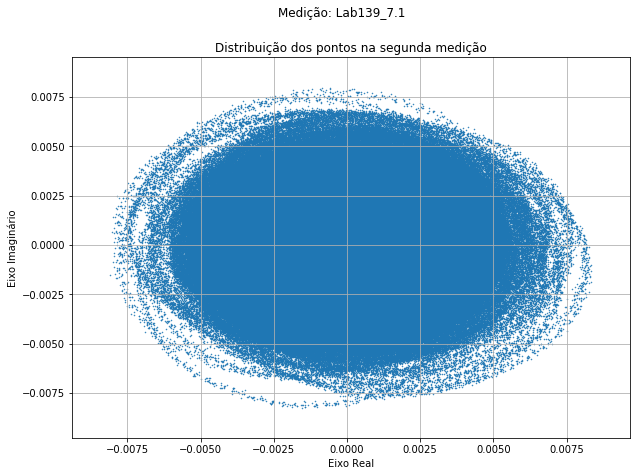

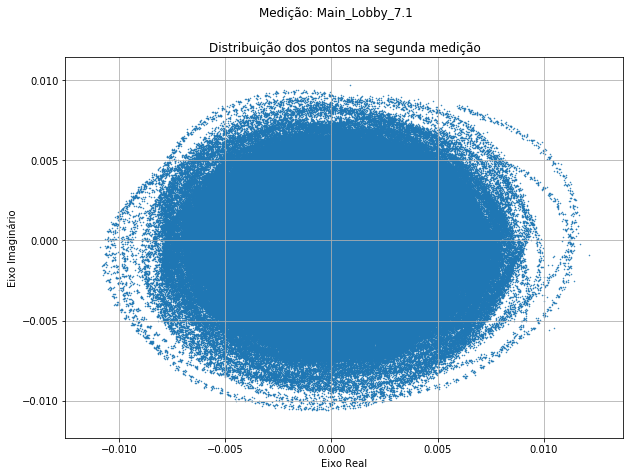

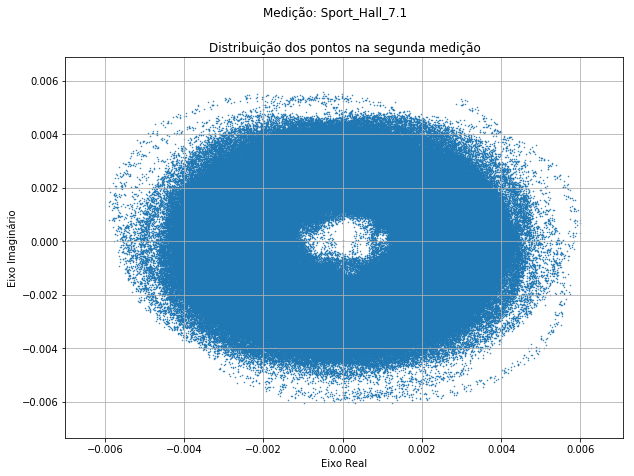

In [14]:
array_x = None
array_y = None
for (key,value) in Datasets.items():    
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na segunda medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc2_S21"].values
    array_y = Datasets[key]["im:Trc2_S21"].values  
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1)

## Clustering dos dados para realizar o agrupamento

In [82]:
ModelCluster = KMeans(n_clusters=3,n_jobs=-1)
for (key,value) in Datasets.items():
    print(key)

Corridor_rm155_7.1
Lab139_7.1
Main_Lobby_7.1
Sport_Hall_7.1


In [94]:
dataframe_x_y = pd.DataFrame()
for (key,value) in Datasets.items():
    #Primeira leitura
    dataframe_x_y["x"] = Datasets[key]["re:Trc1_S11"].values
    dataframe_x_y["y"] = Datasets[key]["im:Trc1_S11"].values
    result_fit = ModelCluster.fit(dataframe_x_y.values)
    Datasets[key]["label_read_1"] = result_fit.labels_
    #Segunda leitura
    dataframe_x_y["x"] = Datasets[key]["re:Trc2_S21"].values
    dataframe_x_y["y"] = Datasets[key]["im:Trc2_S21"].values
    result_fit = ModelCluster.fit(dataframe_x_y.values)
    Datasets[key]["label_read_2"] = result_fit.labels_

## Resultados obtidos da clustering feita usando o KMeans

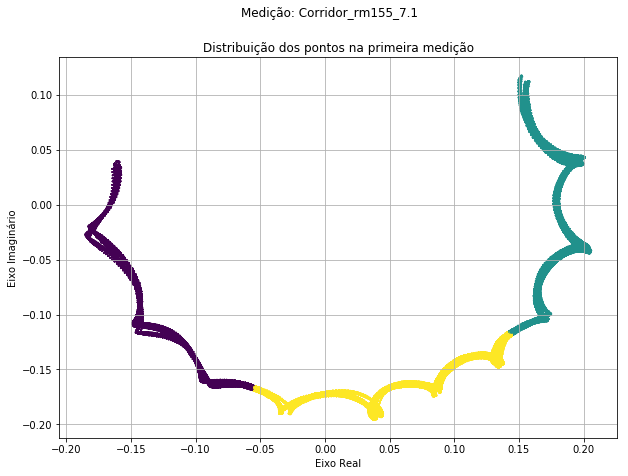

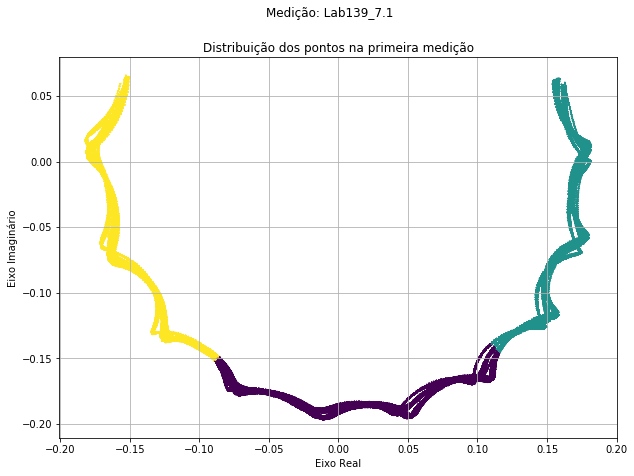

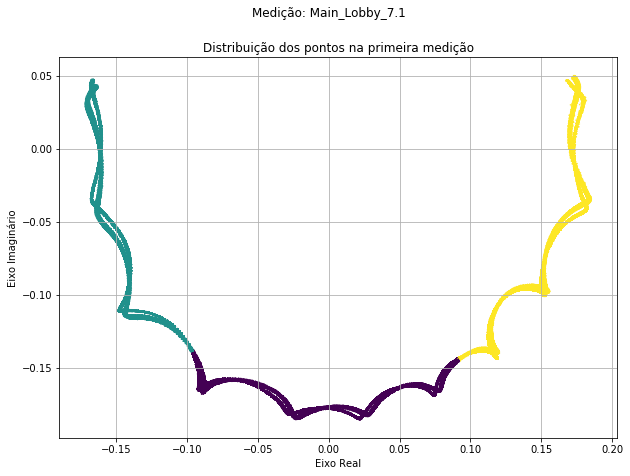

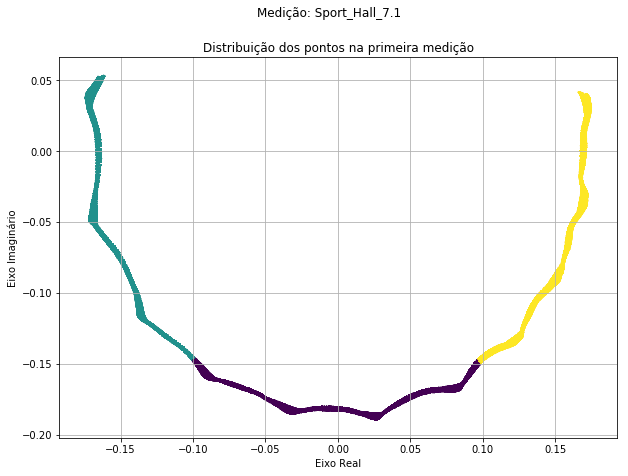

In [17]:
for (key,value) in Datasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na primeira medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc1_S11"]
    array_y = Datasets[key]["im:Trc1_S11"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=Datasets[key]["label_read_1"].values)

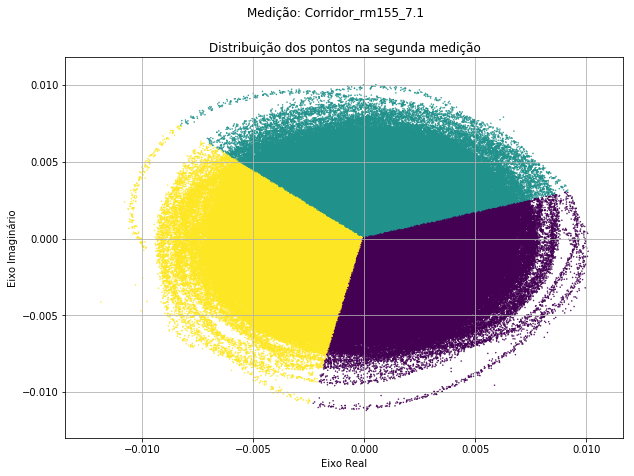

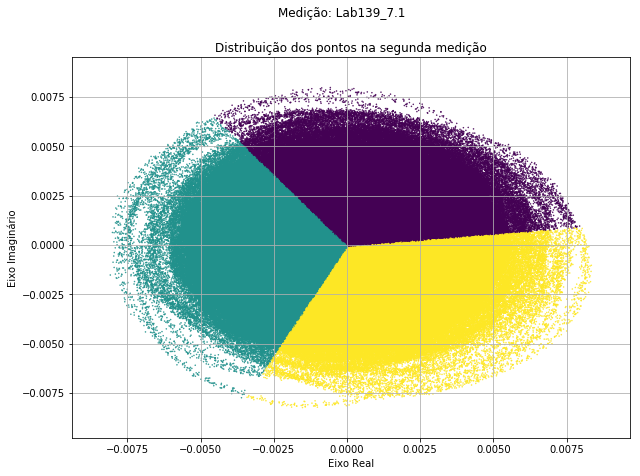

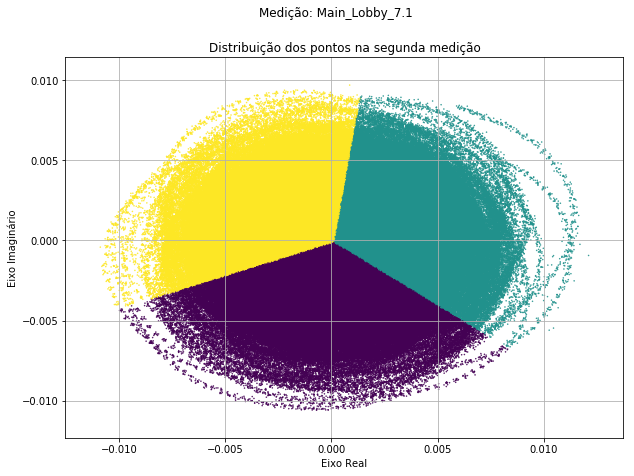

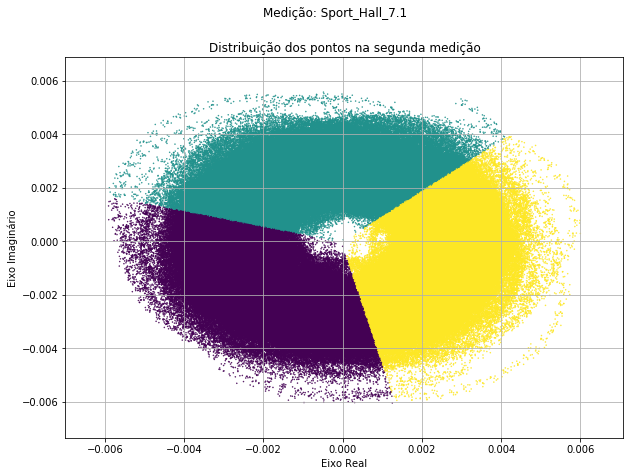

In [18]:
for (key,value) in Datasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na segunda medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc2_S21"]
    array_y = Datasets[key]["im:Trc2_S21"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=Datasets[key]["label_read_2"].values)

### Junção dos resultos obtidos da leitura do primeiro sensor e do segundo sensor

In [145]:
NewDatasets = dict()
NewDatasets = Datasets

In [147]:
for (key,value) in NewDatasets.items():    
    #NewDatasets[key]["Label"].values = Datasets[key]["label_read_1"].values if Datasets[key]["label_read_1"].values == Datasets[key]["label_read_2"].values else Datasets[key]["Label"].values     
    mask = NewDatasets[key]["label_read_1"].values == NewDatasets[key]["label_read_2"].values
    print(key,"->",str(np.sum(mask)))
    NewDatasets[key]["Label"]=np.where(mask,NewDatasets[key]["label_read_1"],NewDatasets[key]["Label"])
    #NewDatasets[key] = np.where(mask,NewDatasets[key]["Label"].values,NewDatasets[key]["label_read_1"].values)

Corridor_rm155_7.1 -> 414676
Lab139_7.1 -> 393464
Main_Lobby_7.1 -> 409559
Sport_Hall_7.1 -> 389921


### Visualização dos valores das Labels filtradas

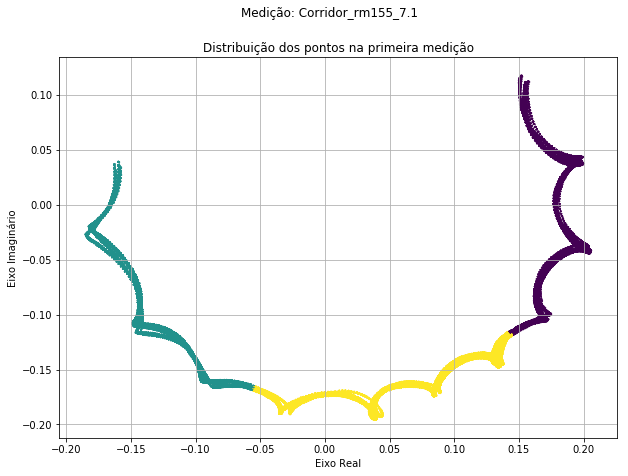

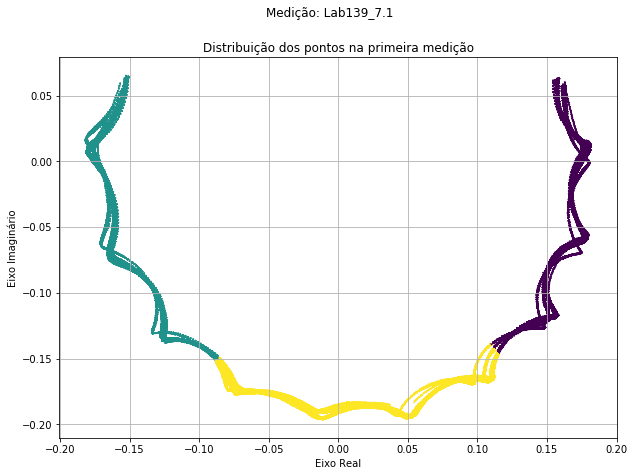

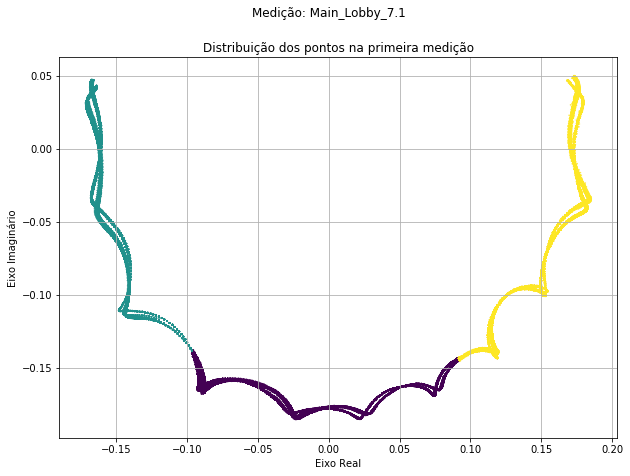

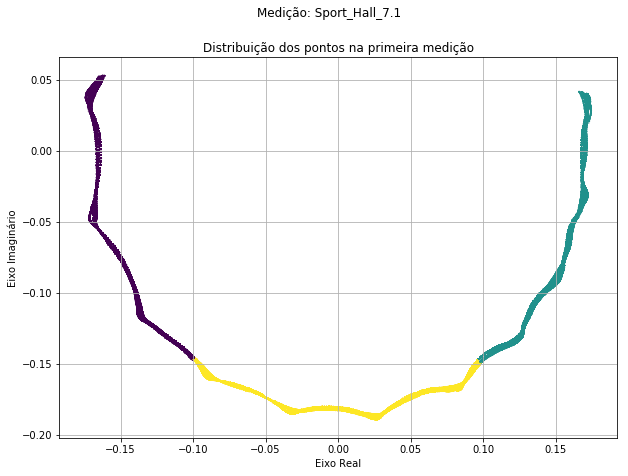

In [148]:
for (key,value) in NewDatasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na primeira medição")
    plt.suptitle("Medição: "+str(key))
    array_x = NewDatasets[key]["re:Trc1_S11"]
    array_y = NewDatasets[key]["im:Trc1_S11"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=NewDatasets[key]["Label"].values)

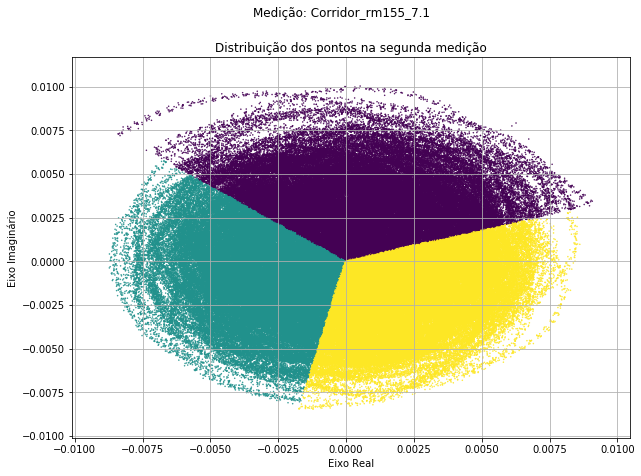

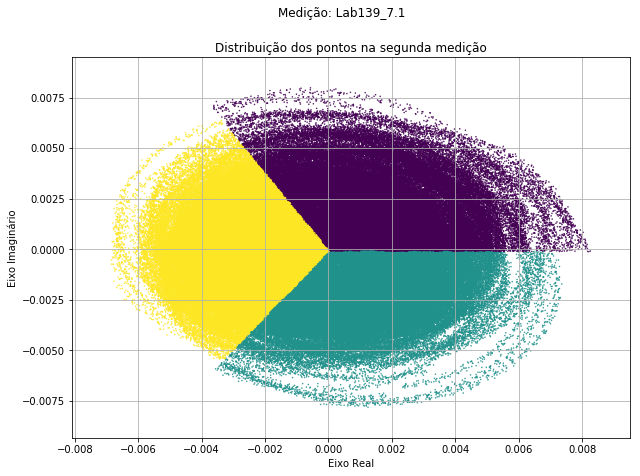

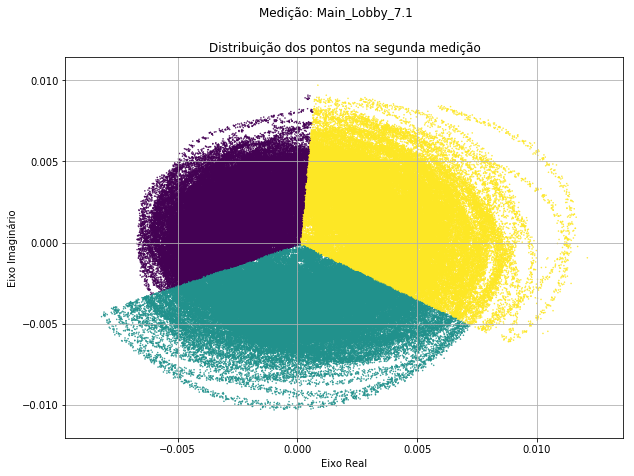

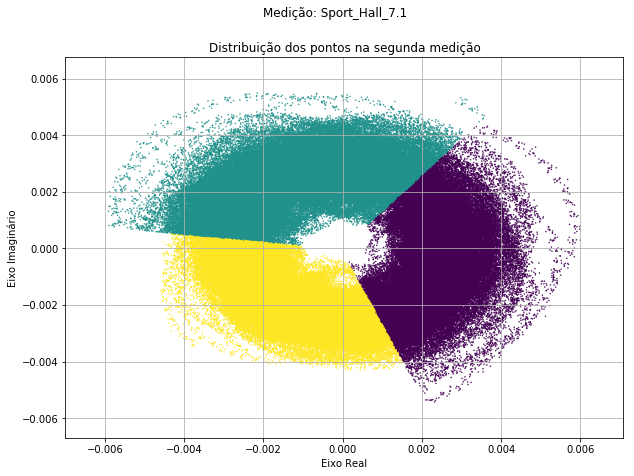

In [151]:
for (key,value) in NewDatasets.items():
    #if(Datasets[key]["label_read_1"] == Datasets[key]["label_read_2"]):
    plt.figure(figsize=(10,7))            
    plt.xlabel("Eixo Real")
    plt.ylabel("Eixo Imaginário")
    plt.title("Distribuição dos pontos na segunda medição")
    plt.suptitle("Medição: "+str(key))
    array_x = Datasets[key]["re:Trc2_S21"]
    array_y = Datasets[key]["im:Trc2_S21"]
    plt.grid(axis="both")
    plt.scatter(x=array_x,y=array_y,marker=".",s=1,c=Datasets[key]["Label"].values)